# <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

In [ ]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
#Construir red neuronal
from tensorflow.keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser sigmoidal para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.4562
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7737 - accuracy: 0.4674
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.4804
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7518 - accuracy: 0.4916
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.5028
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.5102
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.5177
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.5270
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.5438
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5549
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7579
Epoch 85/200
6/6 [==============================] - 0s 996us/step - loss: 0.5058 - accuracy: 0.7616
Epoch 86/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7598
Epoch 87/200
6/6 [==============================] - 0s 996us/step - loss: 0.5041 - accuracy: 0.7598
Epoch 88/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7635
Epoch 89/200
6/6 [==============================] - 0s 996us/step - loss: 0.5025 - accuracy: 0.7635
Epoch 90/200
6/6 [==============================] - 0s 997us/step - loss: 0.5017 - accuracy: 0.7635
Epoch 91/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7616
Epoch 92/200
6/6 [==============================] - 0s 797us/step - loss: 0.5002 - accuracy: 0.7616
Epoch 93/200
6/6 [==============================] - 0s 997us/step - loss: 0.4994 - accuracy: 0.7635
Epoch 94/200
6/6 [===

6/6 [==============================] - 0s 996us/step - loss: 0.4657 - accuracy: 0.7821
Epoch 167/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7821
Epoch 168/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7821
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7821
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7840
Epoch 171/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7840
Epoch 172/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7840
Epoch 173/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7840
Epoch 174/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7858
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7858
Epoch 176/200
6/6 [===

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

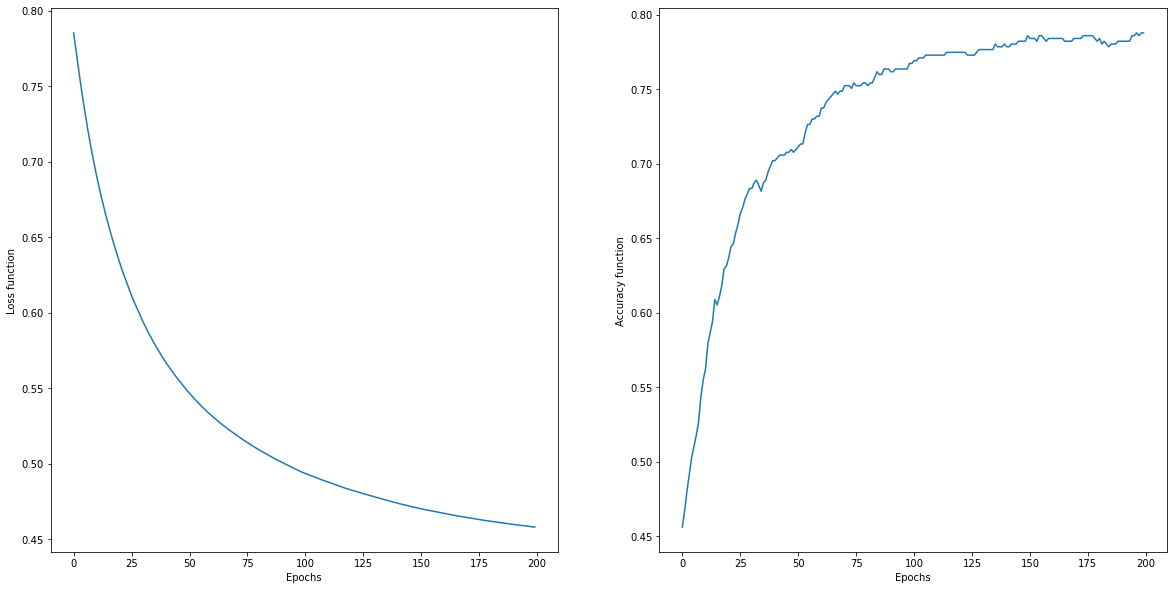

In [9]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'),plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = model.predict(X_test)

In [11]:
Y_pred

array([[0.27904502],
       [0.1673919 ],
       [0.09865594],
       [0.22413749],
       [0.5011872 ],
       [0.5445249 ],
       [0.04019502],
       [0.46753407],
       [0.64119   ],
       [0.7496404 ],
       [0.21003446],
       [0.86433804],
       [0.36532676],
       [0.37541837],
       [0.0585165 ],
       [0.4216777 ],
       [0.14264348],
       [0.07294631],
       [0.4080214 ],
       [0.58216655],
       [0.23390254],
       [0.12202519],
       [0.24723893],
       [0.08498928],
       [0.5375486 ],
       [0.85968226],
       [0.12099981],
       [0.09452471],
       [0.31354854],
       [0.14173281],
       [0.79198915],
       [0.8963088 ],
       [0.7903955 ],
       [0.5281554 ],
       [0.8209945 ],
       [0.72676   ],
       [0.89964926],
       [0.3679321 ],
       [0.3136658 ],
       [0.46563086],
       [0.06901416],
       [0.61918855],
       [0.55558515],
       [0.2854529 ],
       [0.12515795],
       [0.6125593 ],
       [0.6839299 ],
       [0.177

In [12]:
Y_prob

array([[0.27904502],
       [0.1673919 ],
       [0.09865594],
       [0.22413749],
       [0.5011872 ],
       [0.5445249 ],
       [0.04019502],
       [0.46753407],
       [0.64119   ],
       [0.7496404 ],
       [0.21003446],
       [0.86433804],
       [0.36532676],
       [0.37541837],
       [0.0585165 ],
       [0.4216777 ],
       [0.14264348],
       [0.07294631],
       [0.4080214 ],
       [0.58216655],
       [0.23390254],
       [0.12202519],
       [0.24723893],
       [0.08498928],
       [0.5375486 ],
       [0.85968226],
       [0.12099981],
       [0.09452471],
       [0.31354854],
       [0.14173281],
       [0.79198915],
       [0.8963088 ],
       [0.7903955 ],
       [0.5281554 ],
       [0.8209945 ],
       [0.72676   ],
       [0.89964926],
       [0.3679321 ],
       [0.3136658 ],
       [0.46563086],
       [0.06901416],
       [0.61918855],
       [0.55558515],
       [0.2854529 ],
       [0.12515795],
       [0.6125593 ],
       [0.6839299 ],
       [0.177

In [13]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7316
[0.523115336894989, 0.7316017150878906]


In [16]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [19]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD, Adam

In [20]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
dummy_y = np_utils.to_categorical(Y).astype(int)

In [24]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [25]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


C:\Users\paulo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
2/2 [==============================] - 0s 100ms/step - loss: 1.3562 - accuracy: 0.0667 - val_loss: 1.1983 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 1.1580 - accuracy: 0.4000 - val_loss: 0.9970 - val_accuracy: 0.6333
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.9829 - accuracy: 0.6000 - val_loss: 0.9486 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 0.9333 - accuracy: 0.4333 - val_loss: 0.8442 - val_accuracy: 0.3667
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 0.8438 - accuracy: 0.4083 - val_loss: 0.7148 - val_accuracy: 0.4667
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 0.7136 - accuracy: 0.4083 - val_loss: 0.6707 - val_accuracy: 0.6333
Epoch 7/200
2/2 [==============================] - 0s 25ms/step - loss: 0.6583 - accuracy: 0.6750 - val_loss: 0.6378 - val_accuracy: 0.6333
Epoch 8/200
2/2 [==

Epoch 59/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1685 - accuracy: 0.9500 - val_loss: 0.1727 - val_accuracy: 0.9667
Epoch 60/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1708 - accuracy: 0.9500 - val_loss: 0.2816 - val_accuracy: 0.8333
Epoch 61/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1746 - accuracy: 0.9417 - val_loss: 0.1947 - val_accuracy: 0.9000
Epoch 62/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1932 - accuracy: 0.9333 - val_loss: 0.1491 - val_accuracy: 0.9667
Epoch 63/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1409 - accuracy: 0.9667 - val_loss: 0.5421 - val_accuracy: 0.8333
Epoch 64/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4852 - accuracy: 0.7583 - val_loss: 0.1385 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1566 - accuracy: 0.9667 - val_loss: 0.2657 - val_accuracy: 0.8333
Epoch 66/200


Epoch 117/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1117 - accuracy: 0.9667 - val_loss: 0.1296 - val_accuracy: 0.9333
Epoch 118/200
2/2 [==============================] - 0s 22ms/step - loss: 0.1023 - accuracy: 0.9750 - val_loss: 0.0746 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 0.0783 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0986 - accuracy: 0.9750 - val_loss: 0.4735 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 26ms/step - loss: 0.2160 - accuracy: 0.9250 - val_loss: 0.0910 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 26ms/step - loss: 0.0955 - accuracy: 0.9750 - val_loss: 0.0681 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1015 - accuracy: 0.9500 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 

Epoch 175/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1076 - accuracy: 0.9583 - val_loss: 0.0685 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1013 - accuracy: 0.9583 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.3473 - val_accuracy: 0.8667
Epoch 178/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1137 - accuracy: 0.9500 - val_loss: 0.1514 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1687 - accuracy: 0.9333 - val_loss: 0.1321 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1311 - accuracy: 0.9417 - val_loss: 0.6542 - val_accuracy: 0.8333
Epoch 181/200
2/2 [==============================] - 0s 22ms/step - loss: 0.3126 - accuracy: 0.9167 - val_loss: 0.1001 - val_accuracy: 0.9667
Epoch 

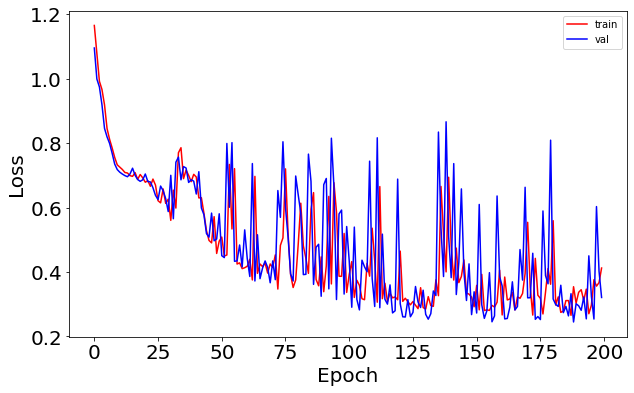

In [26]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [29]:
#Predecir con el modelo
Y_pred = model.predict_step(X)
Y_prob = model.predict_on_batch(X)

In [30]:
#Evaluar el modelo
#score = model.evaluate(X, dummy_y,verbose=1)
#print(score)

score = model.evaluate(X_test,y_test)
print(score)

1/1 [==============================] - 0s 15ms/step - loss: 0.1031 - accuracy: 0.9667
[0.10306243598461151, 0.9666666388511658]


In [33]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [35]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


C:\Users\paulo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
